In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("housing_data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df = df.fillna(df.mean())
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [ ]:
dataset = df.values

X = dataset[:,0:13]
Y = dataset[:,13]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (404, 13)
X_test shape:  (102, 13)
y_train shape:  (404,)
y_test shape:  (102,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Specify the optimizer
optimizer = Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 514.4575 - val_loss: 349.4997
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 249.7919 - val_loss: 132.1036
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136.4898 - val_loss: 64.1468
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.2402 - val_loss: 48.4460
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.4760 - val_loss: 42.6401
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.6006 - val_loss: 39.0144
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.3326 - val_loss: 34.2882
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.5162 - val_loss: 31.8470
Epoch 9/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.8937 - val_loss: 32.2346
Epoch 10/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.9746 - val_loss: 28.1102
Epoch 11/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.6169 - val_loss: 29.7597
Epoch 12/1000
12/12 ━━━━

In [ ]:
loss = model.evaluate(X_test, y_test)

print(f"Test loss: {loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.1394 
Test loss: 14.371870040893555


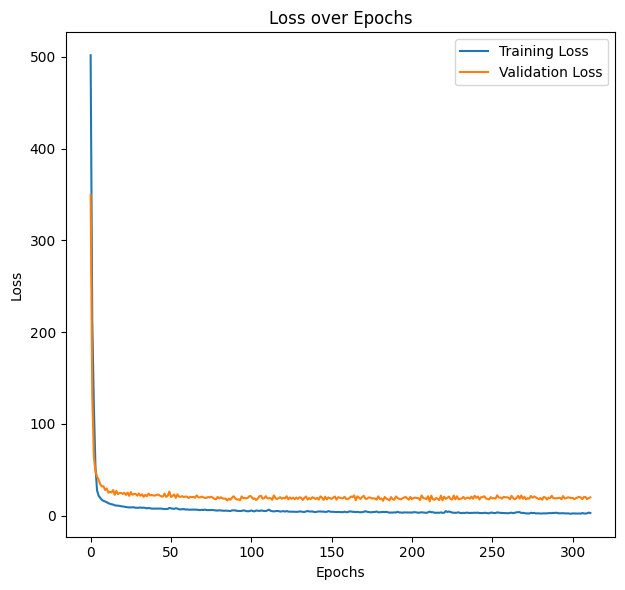

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()